# Dependencies

In [2]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

In [3]:
pacman::p_load(dplyr, ggplot2, ComplexHeatmap, circlize)

# Functions

In [56]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

In [5]:
heatmap_Tcells.fx <- function(metadata_div, patient) {
    mypt <- metadata_div[metadata_div$Patient == patient, ]
    mypt_pbmc <- mypt[which(mypt$sampletype == "PBMC"), ]

    rownames(mypt_pbmc) <- mypt_pbmc$cycle

    Tcellmat <- as.matrix(mypt_pbmc[, c("Naïve.", "SCM.", "CM.", "EM.", "TE.")])
    colnames(Tcellmat) <- c("%Naïve", "%SCM", "%CM", "%EM", "%TE")

    myroworder <- c("X01", "X02", "X03", "X04", "X05")
    Tcellmat <- Tcellmat[intersect(myroworder, rownames(Tcellmat)), ] # reorder rows from cycle 1 to 5

    anno_CD3 <- HeatmapAnnotation(
        TEfold = anno_barplot((mypt_pbmc$FOLD), height = unit(2, "cm")),
        AbsoluteCount = anno_barplot((mypt_pbmc$ATC), height = unit(2, "cm")),
        TotalCD3 = anno_barplot((mypt_pbmc$CD3), height = unit(2, "cm")),
        gap = unit(5, "mm")
    )

    col_fun <- colorRamp2(c(0, 50, 100), c("white", "#ef6548", "#7f0000"))

    heatmap_tcells <- Heatmap(t(Tcellmat),
        top_annotation = anno_CD3,
        name = "T-cells %",
        column_title = paste(unique(mypt_pbmc$Patient), unique(mypt_pbmc$Disease_type), sep = "_"),
        col = col_fun,
        # format rows
        row_names_gp = gpar(fontsize = 15),
        cluster_rows = FALSE,
        show_row_dend = FALSE,
        # format cols
        cluster_columns = FALSE,
        column_names_gp = gpar(fontsize = 15),
        rect_gp = gpar(col = "black"),
        # legend
        show_heatmap_legend = TRUE,
        width = unit(nrow(Tcellmat), "cm"),
        height = unit(2.5, "cm"),
        heatmap_legend_param = list(labels_gp = gpar(fontsize = 12))
    )
    return(heatmap_tcells)
}


In [6]:
heatmap_NCR.fx <- function(metadata_div, patient) {
    
    mypt <- metadata_div[metadata_div$Patient == patient, ]
    mypt_pbmc <- mypt[which(mypt$sampletype == "PBMC"), ]

    rownames(mypt_pbmc) <- mypt_pbmc$cycle

    NCRmat <- as.matrix(mypt_pbmc[, c("PD1.", "PDL1.", "TIM3.", "LAG3.", "CTLA4.")])
    colnames(NCRmat) <- c("%PD-1", "%PD-L1", "%TIM-3", "%LAG-3", "%CTLA-4")
    
    myroworder <- c("X01", "X02", "X03", "X04", "X05")
    NCRmat <- NCRmat[intersect(myroworder, rownames(NCRmat)), ] # reorder rows from cycle 1 to 5

    col_fun <- colorRamp2(c(0, 50, 100), c("white", "#ef6548", "#7f0000"))

    heatmap_ncr <- Heatmap(t(NCRmat),
        name = "NCR %",
        # column_title = paste(unique(mypt_pbmc$Patient), unique(mypt_pbmc$Disease_type), sep = "_"),
        col = col_fun,
        # format rows
        row_names_gp = gpar(fontsize = 15),
        cluster_rows = FALSE,
        show_row_dend = FALSE,
        # format cols
        cluster_columns = FALSE,
        column_names_gp = gpar(fontsize = 15),
        rect_gp = gpar(col = "black"),
        # legend
        show_heatmap_legend = TRUE,
        width = unit(nrow(NCRmat), "cm"),
        height = unit(2.5, "cm"),
        heatmap_legend_param = list(labels_gp = gpar(fontsize = 12))
    )
    return(heatmap_ncr)
}


# Paths

In [7]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [8]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [9]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [10]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,...,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,basename,Group,sampletype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,10.591,10.601,0.074,8.556,8.561,0.097,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt,CHP_10YO-M_PBMC_DNA,CHP,PBMC
2,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,11.607,11.614,0.055,10.406,10.414,0.074,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt,CHP_11YO-M_PBMC_DNA,CHP,PBMC
3,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,NA,...,8.982,8.989,0.042,8.560,8.570,0.060,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt,CHP_15YO-F-A_PBMC_DNA,CHP,PBMC
4,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,NA,...,6.330,6.334,0.039,5.870,5.876,0.059,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt,CHP_15YO-F-B_PBMC_DNA,CHP,PBMC
5,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,21.110,21.120,0.040,20.321,20.339,0.079,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt,CHP_15YO-M_PBMC_DNA,CHP,PBMC
6,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,3.972,3.973,0.007,3.944,3.946,0.012,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt,CHP_16YO-M_PBMC_DNA,CHP,PBMC


In [11]:
unique(meta_div$Patient[!is.na(meta_div$TRB) & is.na(meta_div$CD3)])


[1] "CHP_10YO_M"   "CHP_11YO_M"   "CHP_15YO_F_A" "CHP_15YO_F_B" "CHP_15YO_M"  
 [6] "CHP_16YO_M"   "CHP_1YO_M_A"  "CHP_1YO_M_B"  "CHP_2YO_M"    "CHP_366"     
[11] "CHP_3YO_F"    "CHP_3YO_M_A"  "CHP_3YO_M_B"  "CHP_5YO_M"    "CHP_8MO_F"   
[16] "LFS_TCR_4535" "LFS_TCR_4570" "LFS_TCR_4602" "LFS_TCR_4758" "LFS_TCR_4759"
[21] "LFS_TCR_4783" "LFS_TCR_4837" "LFS_TCR_4838" "LFS_TCR_5014" "LFS_TCR_5067"
[26] "CHP_344"      "CHP_361"      "CHP_364"      "CHP_370"      "CHP_372"     
[31] "CHP_380"      "CHP_389"      "CHP_390"      "CHP_394"      "CHP_400"     
[36] "CHP_401"      "CHP_404"      "CHP_407"      "CHP_412"      "CHP_418"

In [12]:
h1 <- heatmap_Tcells.fx(meta_div, "CHP_400")

In [13]:
h2 <- heatmap_NCR.fx(meta_div, "CHP_400")

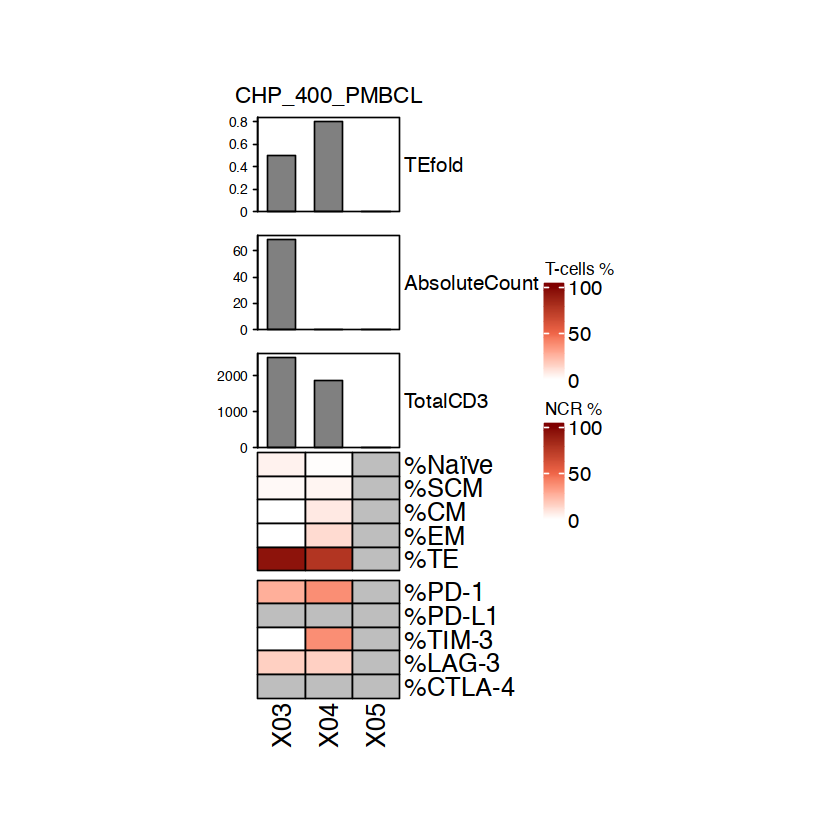

In [14]:
h1 %v% h2

In [17]:
mypt_pbmc

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,...,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,basename,Group,sampletype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
X01,CHP_401_01,CHP_401,X01,0.6,305.10,3,ERMS,0.6,NA,153,...,74.084,74.180,0.281,57.825,57.898,0.345,remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_401-01_PBMC-DNA.txt,CHP_401-01_PBMC-DNA,CHP,PBMC
X03,CHP_401_03,CHP_401,X03,8.7,396.03,3,ERMS,8.7,NA,2428,...,65.774,70.732,1.861,51.598,55.975,3.095,batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_401-03_PBMC_DNA.txt,CHP_401-03_PBMC_DNA,CHP,PBMC
X04,CHP_401_04,CHP_401,X04,4.4,0.00,3,ERMS,4.4,NA,902,...,34.239,34.256,0.094,29.016,29.030,0.128,batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-04-PBMC-DNA.txt,CHP_401-04-PBMC-DNA,CHP,PBMC
X05,CHP_401_05,CHP_401,X05,0.0,0.00,3,ERMS,0,NA,0,...,178.411,179.059,0.604,150.723,151.421,0.930,batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-05-PBMC-DNA.txt,CHP_401-05-PBMC-DNA,CHP,PBMC


In [74]:
tcr_plots.fx <- function(metadata_div, mypath="~/Desktop/H4H/INTERCEPT/NextSeq/", patient, pbmc_cfdna="PBMC") {
      mypt <- metadata_div[metadata_div$Patient == patient, ]
      mypt_pbmc <- mypt[which(mypt$sampletype == pbmc_cfdna), ]
      rownames(mypt_pbmc) <- mypt_pbmc$cycle

      myfilelst <- paste0(mypath, mypt_pbmc$file)

      i <- 1
      for (f in myfilelst) {
            mixcrfle <- read.table(f,
                  header = TRUE, sep = "\t",
                  stringsAsFactors = FALSE,
                  na.strings = c("", "NA")
            )
            if (i == 1) {
                  compldfle <- mixcrfle
                  compldfle <- cbind(
                        cloneno = row.names(compldfle),
                        filename = f,
                        compldfle
                  )
                  i <- i + 1
            } else {
                  compldfle1 <- mixcrfle
                  compldfle1 <- cbind(
                        cloneno = row.names(compldfle1),
                        filename = f,
                        compldfle1
                  )
                  compldfle <- rbind(compldfle, compldfle1)
                  rm(compldfle1)
            }
      }


      compldfle$filename <- as.character(compldfle$filename)

      compldfle$cloneno <- as.character(compldfle$cloneno)
      compldfle$cloneno <- formatC(compldfle$cloneno, width = nchar(max(as.numeric(compldfle$cloneno))), flag = "0")

      compldfle$filename <- gsub(mypath, "", compldfle$filename)
      compldfle$sample_id <- mypt_pbmc$sample_id[match(compldfle$filename, mypt_pbmc$file)]

      # diversity plot
      divpt <- ggplot(data = mypt_pbmc, aes(y = observed_Shannon, x = sample_id)) +
            geom_point(colour = "#030303", stat = "identity", size = 4) +
            theme(
                  axis.title.x = element_blank(),
                  axis.text.x = element_blank(),
                  axis.line = element_line(color = "black"),
                  axis.text = element_text(size = 15),
                  axis.title = element_text(size = 15),
                  legend.position = "none"
            ) +
            theme(
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  panel.background = element_rect(fill = "transparent", colour = NA),
                  panel.border = element_blank(),
                  plot.margin = unit(c(0, 0, 0, 0), "cm")
            ) +
            annotation_logticks(sides = "l") +
            scale_y_continuous(
                  trans = "log10",
                  breaks = c(1, 50, 100, 150),
                  label = c(1, 50, 100, 150)
            )

      # TRB bar plot
      barpt <- ggplot(data = mypt_pbmc, aes(y = TRB, x = sample_id)) +
            geom_bar(fill = "#f3b94e", colour = "#030303", stat = "identity") +
            theme(
                  axis.title.x = element_blank(),
                  axis.text.x = element_blank(),
                  axis.line = element_line(color = "black"),
                  axis.text = element_text(size = 15),
                  axis.title = element_text(size = 15),
                  legend.position = "none"
            ) +
            theme(
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  panel.background = element_rect(fill = "transparent", colour = NA),
                  panel.border = element_blank(),
                  plot.margin = unit(c(0, 0, 0, 0), "cm")
            )


      # TRB clones stacked bar plot
      stkbarpt <- ggplot(data = compldfle, aes(y = cloneFraction, x = sample_id)) +
            geom_bar(fill = "#d9d9d9", colour = "#000000", stat = "identity") +
            theme(
                  axis.title.x = element_blank(),
                  axis.text.x = element_text(angle = 45, hjust = 1),
                  axis.line = element_line(color = "black"),
                  axis.text = element_text(size = 15),
                  axis.title = element_text(size = 15),
                  legend.position = "none"
            ) +
            theme(
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  panel.background = element_rect(fill = "transparent", colour = NA),
                  panel.border = element_blank(),
                  plot.margin = unit(c(0, 0, 0, 0), "cm")
            )

      return(align_plots1(divpt, barpt, stkbarpt))
}


In [75]:
mypath <- "~/Desktop/H4H/INTERCEPT/NextSeq/"

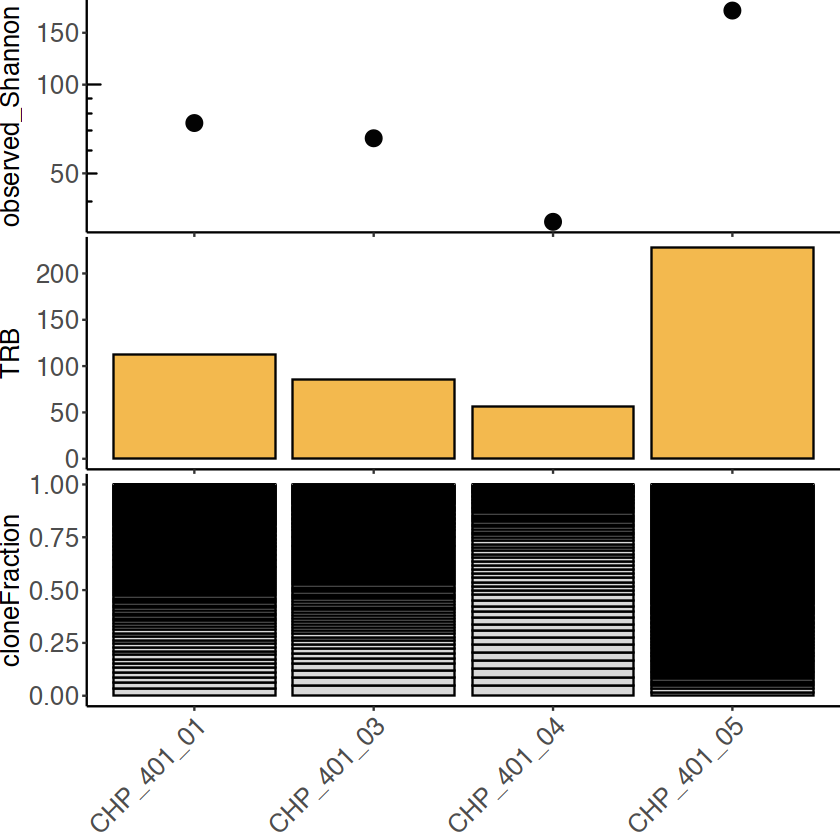

In [77]:
tcr_plots.fx(meta_div, mypath, "CHP_401", pbmc_cfdna="PBMC")

In [73]:
mytcrplots

NULL

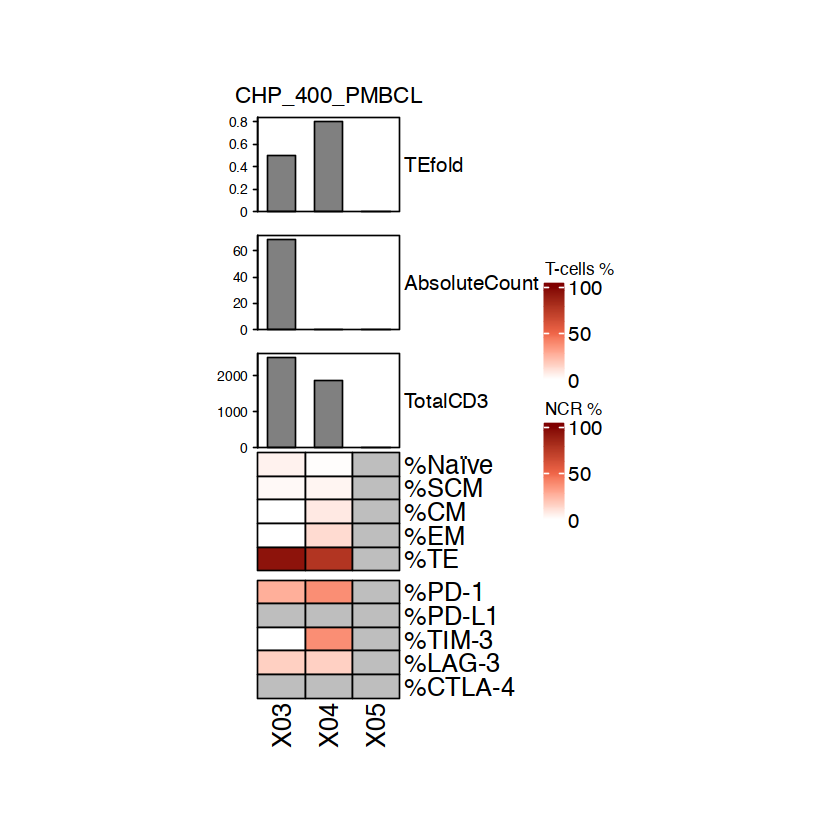

In [86]:
draw(h1 %v% h2)

In [87]:
hmgrob <- grid.grabExpr(draw(h1 %v% h2))
tcrgrob <- grid.grabExpr(tcr_plots.fx(meta_div, mypath, "CHP_400", pbmc_cfdna="PBMC"))

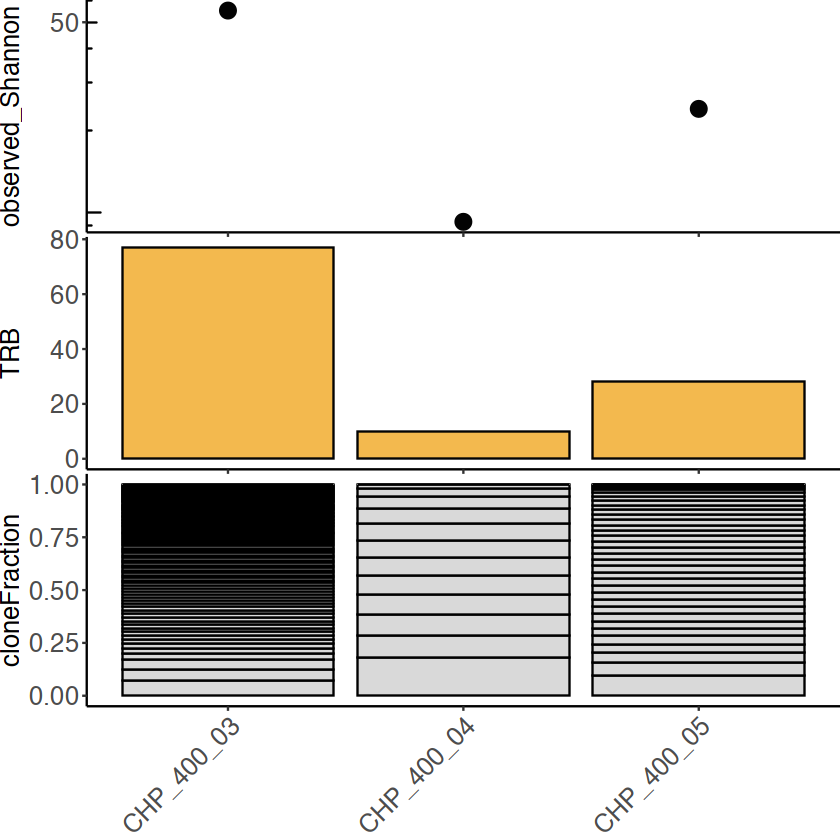

In [88]:
tcr_plots.fx(meta_div, mypath, "CHP_400", pbmc_cfdna="PBMC")

In [ ]:
ht_grob = grid.grabExpr(draw(ht, ...))

pushViewport(viewport(layout = grid.layout(...)))
pushViewport(viewport(layout.pos.row = ..., layout.pos.col = ...))
grid.draw(ht_grob)
popViewport()

In [107]:
ha = HeatmapAnnotation(empti = anno_empty(border = TRUE, height = unit(6, "cm")), width = unit(10, "cm"))


In [110]:
pdf(paste0(plotpath, "tcr_plots.pdf"), width = 10, height = 10)
myht <- draw(h1 %v% h2 %v% ha)
decorate_annotation("empti", {
    grid.draw(tcrgrob)
})
dev.off()

pdf 
  2